<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/Accelerometer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/accelerometer.csv')

In [4]:
df=data.values

In [5]:
df

array([[ 1.000e+00,  2.000e+01,  1.004e+00,  9.000e-02, -1.250e-01],
       [ 1.000e+00,  2.000e+01,  1.004e+00, -4.300e-02, -1.250e-01],
       [ 1.000e+00,  2.000e+01,  9.690e-01,  9.000e-02, -1.210e-01],
       ...,
       [ 3.000e+00,  1.000e+02,  1.156e+00, -9.400e-02, -2.270e-01],
       [ 3.000e+00,  1.000e+02,  9.340e-01,  2.030e-01, -1.720e-01],
       [ 3.000e+00,  1.000e+02,  1.199e+00, -1.760e-01,  1.090e-01]])

In [6]:
data

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [17]:
x=data.values[:,2:4]


In [18]:
x

array([[ 1.004,  0.09 ],
       [ 1.004, -0.043],
       [ 0.969,  0.09 ],
       ...,
       [ 1.156, -0.094],
       [ 0.934,  0.203],
       [ 1.199, -0.176]])

In [19]:
y=data.values[:,4]

In [20]:


y

array([-0.125, -0.125, -0.121, ..., -0.227, -0.172,  0.109])

In [21]:
from sklearn.cluster import KMeans

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal' ))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(x,y,epochs=75,verbose=1)

Epoch 1/75
4782/4782 [==============================] - 12s 2ms/step - loss: 0.2655
Epoch 2/75
4782/4782 [==============================] - 12s 3ms/step - loss: 0.2651
Epoch 3/75
4782/4782 [==============================] - 14s 3ms/step - loss: 0.2650
Epoch 4/75
4782/4782 [==============================] - 12s 3ms/step - loss: 0.2651
Epoch 5/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 6/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 7/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 8/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 9/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 10/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 11/75
4782/4782 [==============================] - 10s 2ms/step - loss: 0.2651
Epoch 12/75
4782/4782 [==============================] - 9s 2ms/step - los

In [29]:
y_pred=model.predict(x)

4782/4782 [==============================] - 8s 2ms/step


In [30]:
y_pred

array([[-0.12224804],
       [-0.12078361],
       [-0.12023665],
       ...,
       [-0.12895726],
       [-0.11946946],
       [-0.13052551]], dtype=float32)

In [32]:
model.evaluate(x=x,y=y_pred)

4782/4782 [==============================] - 8s 2ms/step - loss: 0.0000e+00


0.0

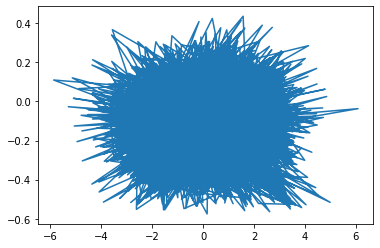

In [34]:
plt.plot(y,y_pred)

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming that the history variable contains the loss and accuracy data during training and validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_data=(x, y), epochs=10)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Epoch 1/10
3807/3825 [============================>.] - ETA: 0s - loss: 0.2651

InvalidArgumentError: ignored